<a href="https://colab.research.google.com/github/RepnaiaE/DataScience_Emotion-recognition-methods/blob/main/Lab1_normalization_tokenization_text_cleaning_and_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Элементы языка Python: базовые операторы, структуры данных и функции. Обзор прикладных пакетов для решения задач анализа речи и текстов. Знакомство с библиотеками re, NLTK, pymorphy2, pymystem3.


# 1 Загрузка корпусов

In [ ]:
import pandas as pd

negative = pd.read_csv('/content/drive/MyDrive/Распознавание эмоций/negative.csv', sep=';',
                       names=['id', 'tdate', 'tname', 'ttext', 'ttype', 'trep', 'trtv', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount'])
negative.head()

,id,tdate,tname,ttext,ttype,trep,trtv,tfav,tstcount,tfol,tfrien,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


In [ ]:
positive = pd.read_csv('/content/drive/MyDrive/Распознавание эмоций/positive.csv', sep=';',
                       names=['id', 'tdate', 'tname', 'ttext', 'ttype', 'trep', 'trtv', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount'])
positive.head()

,id,tdate,tname,ttext,ttype,trep,trtv,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


# 2 Описательная статистика

## Среднее количество ретвитов

In [ ]:
negative['trtv'].mean()

2.0420199601511753

In [ ]:
positive['trtv'].mean()

4.166494069323216

## По одному пользователю

In [ ]:
print('По положительному корпусу: ')
print('Среднее количество сообщений: ', positive.groupby('tname').agg({'id': 'count'}).mean())
print('Минимальное количество сообщений: ', positive.groupby('tname').agg({'id': 'count'}).min())
print('Максимальное количество сообщений: ', positive.groupby('tname').agg({'id': 'count'}).max())
print('Медианное количество сообщений: ', positive.groupby('tname').agg({'id': 'count'}).median())

По положительному корпусу: 
Среднее количество сообщений:  id    1.475071
dtype: float64
Минимальное количество сообщений:  id    1
dtype: int64
Максимальное количество сообщений:  id    50
dtype: int64
Медианное количество сообщений:  id    1.0
dtype: float64


In [ ]:
print('По негативному корпусу: ')
print('Среднее количество сообщений: ', negative.groupby('tname').agg({'id': 'count'}).mean())
print('Минимальное количество сообщений: ', negative.groupby('tname').agg({'id': 'count'}).min())
print('Максимальное количество сообщений: ', negative.groupby('tname').agg({'id': 'count'}).max())
print('Медианное количество сообщений: ', negative.groupby('tname').agg({'id': 'count'}).median())

По негативному корпусу: 
Среднее количество сообщений:  id    1.385906
dtype: float64
Минимальное количество сообщений:  id    1
dtype: int64
Максимальное количество сообщений:  id    52
dtype: int64
Медианное количество сообщений:  id    1.0
dtype: float64


# 3 Регулярные выражения

Выделение слов и предложений в каждом корпусе

In [ ]:
import re

word = r'\w+' // для слов
sentence = r' *[\.\?!] *' // для предложений

// подсчет количества слов и предложений в каждом корпусе

positive_sentence = [re.split(sentence, text) for text in positive['ttext'] if re.split(sentence, text) != '']
positive_count_sentence = [len(text) for text in positive_sentence]
positive_word = [re.findall(word, text) for text in positive['ttext']]
positive_count_word = [len(text) for text in positive_word]

negative_sentence = [re.split(sentence, text) for text in positive['ttext'] if re.split(sentence, text) != '']
negative_count_sentence = [len(text) for text in positive_sentence]
negative_word = [re.findall(word, text) for text in positive['ttext']]
negative_count_word = [len(text) for text in positive_word]

# 4 Токенизация

In [ ]:
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Задание токенизатора для выделения слов (чтобы сразу удалить пунктуацию)

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

## Для позитивного корпуса

Выделений предложений

In [ ]:
positive_sentences = [sent_tokenize(text) for text in positive['ttext']]
positive_count_sentences = [len(text) for text in positive_sentences]
positive_sentences[:5]

[['@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа)'],
 ['Да, все-таки он немного похож на него.',
  'Но мой мальчик все равно лучше:D'],
 ['RT @KatiaCheh: Ну ты идиотка) я испугалась за тебя!!', '!'],
 ['RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD http://t.co/GqG6iuE2…'],
 ['@irina_dyshkant Вот что значит страшилка :D\nНо блин,посмотрев все части,у тебя создастся ощущение,что авторы курили что-то :D']]

In [ ]:
len(positive_sentences)

114911

Выделение слов без пунктуации

In [ ]:
positive_removed_punc_words = [tokenizer.tokenize(s.lower()) for ss in positive_sentences for s in ss]
positive_removed_punc_words[:5]

[['first_timee',
  'хоть',
  'я',
  'и',
  'школота',
  'но',
  'поверь',
  'у',
  'нас',
  'то',
  'же',
  'самое',
  'd',
  'общество',
  'профилирующий',
  'предмет',
  'типа'],
 ['да', 'все', 'таки', 'он', 'немного', 'похож', 'на', 'него'],
 ['но', 'мой', 'мальчик', 'все', 'равно', 'лучше', 'd'],
 ['rt', 'katiacheh', 'ну', 'ты', 'идиотка', 'я', 'испугалась', 'за', 'тебя'],
 []]

In [ ]:
len(positive_removed_punc_words)

171405

## Для негативного корпуса

Выделений предложений

In [ ]:
negative_sentences = [sent_tokenize(text) for text in negative['ttext']]
negative_count_sentences = [len(text) for text in negative_sentences]
negative_sentences[:5]

[['на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:'],
 ['Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :('],
 ['@elina_4post как говорят обещаного три года ждут...(('],
 ['Желаю хорошего полёта и удачной посадки,я буду очень сильно скучать( http://t.co/jCLNzVNv3S'],
 ['Обновил за каким-то лешим surf, теперь не работает простоплеер :(']]

In [ ]:
len(negative_sentences)

111923

Выделение слов без пунктуации

In [ ]:
negative_removed_punc_words = [tokenizer.tokenize(s.lower()) for ss in negative_sentences for s in ss]
negative_removed_punc_words[:5]

[['на',
  'работе',
  'был',
  'полный',
  'пиддес',
  'и',
  'так',
  'каждое',
  'закрытие',
  'месяца',
  'я',
  'же',
  'свихнусь',
  'так',
  'd'],
 ['коллеги',
  'сидят',
  'рубятся',
  'в',
  'urban',
  'terror',
  'а',
  'я',
  'из',
  'за',
  'долбанной',
  'винды',
  'не',
  'могу'],
 ['elina_4post', 'как', 'говорят', 'обещаного', 'три', 'года', 'ждут'],
 ['желаю',
  'хорошего',
  'полёта',
  'и',
  'удачной',
  'посадки',
  'я',
  'буду',
  'очень',
  'сильно',
  'скучать',
  'http',
  't',
  'co',
  'jclnzvnv3s'],
 ['обновил',
  'за',
  'каким',
  'то',
  'лешим',
  'surf',
  'теперь',
  'не',
  'работает',
  'простоплеер']]

In [ ]:
len(negative_removed_punc_words)

164282

# 5 Нормальная форма

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 8.2 MB 10.8 MB/s 


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
positive_norm = [morph.parse(word)[0].normal_form for sentence in positive_removed_punc_words for word in sentence]
positive_norm[:5]

['first_timee', 'хоть', 'я', 'и', 'школотый']

In [ ]:
negative_norm = [morph.parse(word)[0].normal_form for sentence in negative_removed_punc_words for word in sentence]
negative_norm[:5]

['на', 'работа', 'быть', 'полный', 'пиддес']

pymystem3 не выполняется :(

In [ ]:
!pip install pymystem3

In [ ]:
from pymystem3 import Mystem
m = Mystem()
positive_lemmas_for_words = [m.lemmatize(word) for sentence in positive_removed_punc_words for word in sentence]
positive_lemmas_for_words[:5]

# 6 Частота слов

Складываем все слова из предложений в единый список по каждому корпусу

In [ ]:
positive_words_list = []
for s in positive_norm:
    positive_words_list.append(s)

len(positive_words_list)

1525910

In [ ]:
negative_words_list = []
for s in negative_norm:
    negative_words_list.append(s)

len(negative_words_list)

1376849

Вывод 10 наиболее частотных слов в позитивном корпусе

In [ ]:
from nltk.probability import FreqDist

positive_fdist = FreqDist(positive_words_list)
positive_fdist.most_common(10)

[('я', 48829),
 ('и', 32288),
 ('в', 30344),
 ('не', 29689),
 ('t', 22634),
 ('http', 22516),
 ('co', 22485),
 ('rt', 22077),
 ('на', 19829),
 ('что', 18870)]

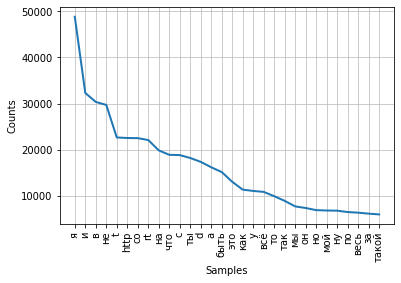

In [ ]:
positive_fdist.plot(30,cumulative=False)

In [ ]:
import matplotlib

(array([69., 13.,  4.,  5.,  5.,  0.,  3.,  0.,  0.,  1.]),
 array([1.00000e+00, 4.88380e+03, 9.76660e+03, 1.46494e+04, 1.95322e+04,
        2.44150e+04, 2.92978e+04, 3.41806e+04, 3.90634e+04, 4.39462e+04,
        4.88290e+04]),
 <a list of 10 Patch objects>)

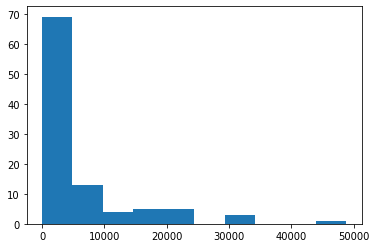

In [ ]:
matplotlib.pyplot.hist(x=list(positive_fdist.values())[:100], bins='rice')

Вывод 10 наиболее частотных слов в негативном корпусе

In [ ]:
from nltk.probability import FreqDist

negative_fdist = FreqDist(negative_words_list)
negative_fdist.most_common(10)

[('я', 59452),
 ('не', 45340),
 ('в', 28815),
 ('и', 28596),
 ('что', 20540),
 ('а', 20099),
 ('на', 18360),
 ('rt', 16041),
 ('с', 14501),
 ('быть', 13433)]

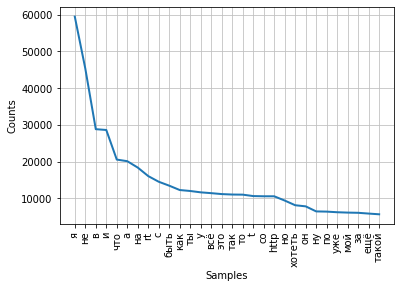

In [ ]:
negative_fdist.plot(30,cumulative=False)

(array([938.,  34.,   7.,   9.,   4.,   1.,   3.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 2.973550e+03, 5.946100e+03, 8.918650e+03,
        1.189120e+04, 1.486375e+04, 1.783630e+04, 2.080885e+04,
        2.378140e+04, 2.675395e+04, 2.972650e+04, 3.269905e+04,
        3.567160e+04, 3.864415e+04, 4.161670e+04, 4.458925e+04,
        4.756180e+04, 5.053435e+04, 5.350690e+04, 5.647945e+04,
        5.945200e+04]),
 <a list of 20 Patch objects>)

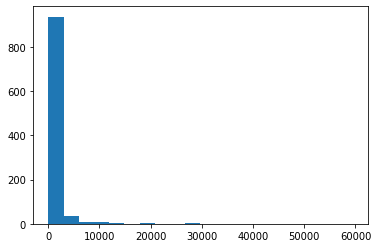

In [ ]:
matplotlib.pyplot.hist(x=list(negative_fdist.values())[:1000], bins='rice')

# 7 Графики распределения количества слов в предложениях

В позитивном корпусе

(array([6.5740e+03, 0.0000e+00, 7.5670e+03, 0.0000e+00, 0.0000e+00,
        8.9110e+03, 0.0000e+00, 0.0000e+00, 1.2475e+04, 0.0000e+00,
        1.0643e+04, 0.0000e+00, 0.0000e+00, 1.0498e+04, 0.0000e+00,
        0.0000e+00, 1.1849e+04, 0.0000e+00, 1.3247e+04, 0.0000e+00,
        0.0000e+00, 1.3563e+04, 0.0000e+00, 0.0000e+00, 1.2489e+04,
        0.0000e+00, 0.0000e+00, 1.0676e+04, 0.0000e+00, 9.0610e+03,
        0.0000e+00, 0.0000e+00, 7.4630e+03, 0.0000e+00, 0.0000e+00,
        5.9750e+03, 0.0000e+00, 4.8650e+03, 0.0000e+00, 0.0000e+00,
        4.1430e+03, 0.0000e+00, 0.0000e+00, 3.4720e+03, 0.0000e+00,
        0.0000e+00, 2.9280e+03, 0.0000e+00, 2.3520e+03, 0.0000e+00,
        0.0000e+00, 2.0210e+03, 0.0000e+00, 0.0000e+00, 1.6630e+03,
        0.0000e+00, 1.3590e+03, 0.0000e+00, 0.0000e+00, 9.8400e+02,
        0.0000e+00, 0.0000e+00, 7.6500e+02, 0.0000e+00, 4.7700e+02,
        0.0000e+00, 0.0000e+00, 2.7900e+02, 0.0000e+00, 0.0000e+00,
        1.4800e+02, 0.0000e+00, 0.0000e+00, 6.70

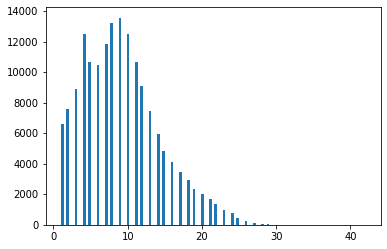

In [ ]:
positive_removed_punc_words_counts = [len(words) for words in positive_removed_punc_words if len(words) > 0]
matplotlib.pyplot.hist(x=positive_removed_punc_words_counts, bins='rice')

В негативном корпусе

(array([4.9680e+03, 0.0000e+00, 6.4830e+03, 0.0000e+00, 0.0000e+00,
        8.0640e+03, 0.0000e+00, 0.0000e+00, 1.0562e+04, 0.0000e+00,
        0.0000e+00, 1.0793e+04, 0.0000e+00, 0.0000e+00, 1.2352e+04,
        0.0000e+00, 0.0000e+00, 1.4327e+04, 0.0000e+00, 0.0000e+00,
        1.4500e+04, 0.0000e+00, 0.0000e+00, 1.2616e+04, 0.0000e+00,
        0.0000e+00, 1.0719e+04, 0.0000e+00, 0.0000e+00, 8.8720e+03,
        0.0000e+00, 0.0000e+00, 7.4200e+03, 0.0000e+00, 0.0000e+00,
        6.1270e+03, 0.0000e+00, 4.9440e+03, 0.0000e+00, 0.0000e+00,
        4.0810e+03, 0.0000e+00, 0.0000e+00, 3.3220e+03, 0.0000e+00,
        0.0000e+00, 2.8040e+03, 0.0000e+00, 0.0000e+00, 2.4650e+03,
        0.0000e+00, 0.0000e+00, 2.0030e+03, 0.0000e+00, 0.0000e+00,
        1.7460e+03, 0.0000e+00, 0.0000e+00, 1.3720e+03, 0.0000e+00,
        0.0000e+00, 1.0930e+03, 0.0000e+00, 0.0000e+00, 8.4500e+02,
        0.0000e+00, 0.0000e+00, 6.5500e+02, 0.0000e+00, 0.0000e+00,
        4.5800e+02, 0.0000e+00, 2.4500e+02, 0.00

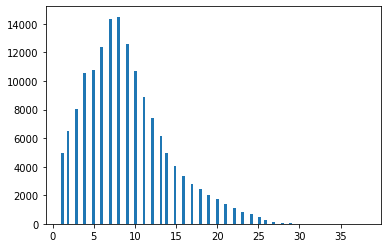

In [ ]:
negative_removed_punc_words_counts = [len(words) for words in negative_removed_punc_words if len(words) > 0]
matplotlib.pyplot.hist(x=negative_removed_punc_words_counts, bins='rice')

# Вывод

В данной лабораторной работе были рассмотрены способы обоработки текста (нормализация, токенизация, очистка текста) и приведение статистики об обучающих данных.